# What Data Science Topics are People Most Interested in Learning About?

This project investigates unanswered data science questions from the Data Science Stack Exchange website (https://datascience.stackexchange.com/) to determine what the most popular topics people are asking about on this site. Per the website's description, "Data Science Stack Exchange is a question and answer site for Data science professionals, Machine Learning specialists, and those interested in learning more about the field."

Stack Exchange provides a public database for each of its sites. The Data Science Stack Exchange database has been queried and the results saved into two Excel csv files: one for 2019 questions and one for all questions. 

## Summary of Results

Deep learning and its related tags seems to be the most popular topics to ask questions about on the DSSE website. There was an increasing trend of questions asked about deep learning between 2014 and 2018 that has since plateaued such that about 40% of the questions asked on the DSSE website are in relation to deep learning. 

## Read in the data

In [1]:
#Import pandas, numpy, matplotlib, and seaborn modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Enable matplotlib plots to be plotted inline in the Jupyter Notebook
%matplotlib inline

#Read in the "2019_questions" csv file
#Convert 'CreationDate' column into datetime format
questions = pd.read_csv('2019_questions.csv', parse_dates = ['CreationDate'])

## Investigate the data

In [2]:
#View the first 10 rows of the data frame
questions.head(10)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN
5,44430,2019-01-23 11:13:32,0,283,<fuzzy-logic>,1,NaN
6,44432,2019-01-23 11:17:46,1,214,<time-series><anomaly-detection><online-learning>,0,1.0
7,44436,2019-01-23 12:49:39,0,9,<matrix-factorisation>,0,NaN
8,44437,2019-01-23 13:04:11,0,7,<correlation><naive-bayes-classifier>,0,NaN
9,44438,2019-01-23 13:16:29,0,584,<machine-learning><python><deep-learning><kera...,1,NaN


In [3]:
#Investigate the columns to see what data types they contain and to check for null values
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  1407 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


Most columns have the same number of non-null values. However, the 'Favorite Count' column has a large amount of null values. 

## Clean the data

In [4]:
#Replace the null values in the 'FavoriteCount' column with 0 and convert the values in the column to the integer data type
questions.fillna(value = {'FavoriteCount': 0}, inplace = True)
questions['FavoriteCount'] = questions['FavoriteCount'].astype(int)
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int32
dtype: object

In [5]:
#Convert the 'Tags' column entries to a list of tags:
#Replace the beginning < character and ending > character with nothing
#Split on the remaining >< between each tag to create a list
questions['Tags'] = questions['Tags'].str.replace('^<|>$', '').str.split('><')
questions.sample(3)

C:\Users\bwil8\AppData\Local\Temp/ipykernel_11084/2180842936.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  questions['Tags'] = questions['Tags'].str.replace('^<|>$', '').str.split('><')


,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
5167,51715,2019-05-10 03:08:51,0,6,"[regression, sampling]",0,0
276,44554,2019-01-25 10:36:38,0,4410,"[python, historgram]",1,0
6185,52890,2019-05-30 06:54:42,1,55,"[keras, scikit-learn, probability-calibration]",0,0


## Plot the Most Used Tags

In [6]:
#Create a dictionary with each tag as a key and each respective tag count as a value 
tag_count = dict()

#Loop through the 'Tags' column to create a key for each unique tag
#Each time the tag occurs after the first unique entry, add one to the value in the dictionary for that tag
for tags in questions['Tags']:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag]+= 1
        else:
            tag_count[tag]= 1

In [7]:
#Convert the tag_count dictionary to a dataframe with each key as a row index
#Rename the count column from '0' to 'Count'
tag_count = pd.DataFrame.from_dict(tag_count, orient='index')
tag_count.rename(columns = {0: 'Count'}, inplace=True)
tag_count.head(10)

,Count
machine-learning,2693
data-mining,217
regression,347
linear-regression,175
regularization,50
python,1814
time-series,466
forecast,34
forecasting,85
scikit-learn,540


In [8]:
#Create a sorted subset of the dataframe that stores the top 20 tags with the highest count values
most_used = tag_count.sort_values(by='Count').tail(20)
most_used

,Count
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


<AxesSubplot:>

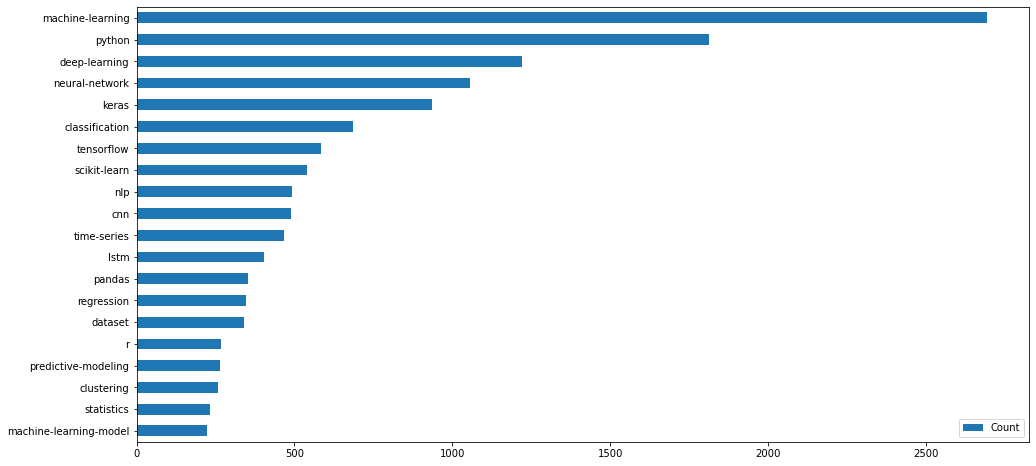

In [9]:
#Plot the most_used dataframe in a horizontal bar plot
most_used.plot(kind='barh', figsize=(16,8))

## Plot the Most Viewed Tags

In [10]:
#Create a dictionary to store the number of times a particular tag has been viewed on the site
tag_view_count = dict()

#Iterate over each row of the dataframe
#Each time a tag occurs in the 'Tags' column, create a key for each unique tag with the 'ViewCount' column entry as the value
#Each time the tag occurs after the first unique entry, add the 'ViewCount' value to the value in the dictionary for that tag
for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']

In [11]:
#Convert the tag_view_count dictionary to a dataframe with each key as a row index
#Rename the count column from '0' to 'ViewCount'
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)

In [12]:
#Create a sorted subset of the dataframe that stores the top 20 tags with the highest view count values
most_viewed = tag_view_count.sort_values(by='ViewCount').tail(20)
most_viewed

,ViewCount
clustering,33928
csv,38654
pytorch,40240
dataset,43151
regression,49451
numpy,49767
time-series,64134
cnn,70349
nlp,71382
lstm,74458


<AxesSubplot:>

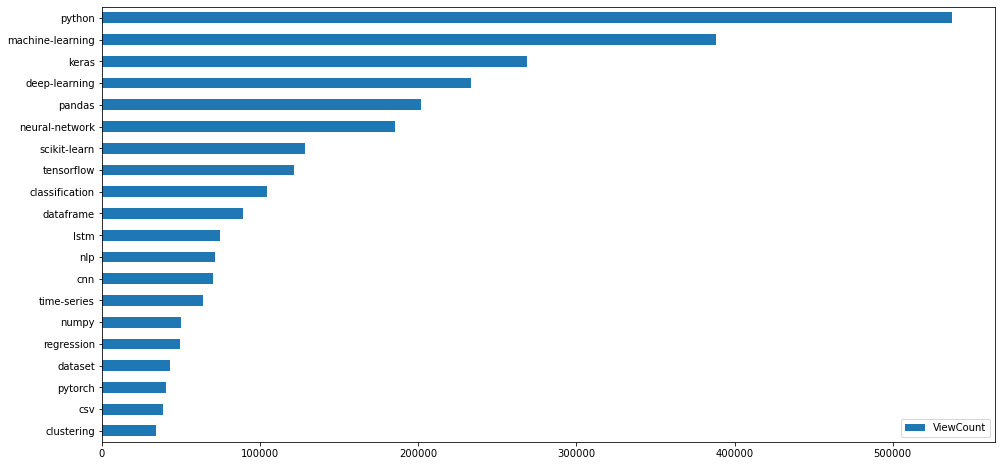

In [13]:
#Plot the most_viewed dataframe in a horizontal bar plot
most_viewed.plot(kind='barh', figsize=(16,8))

array([<AxesSubplot:title={'center':'ViewCount'}>], dtype=object)

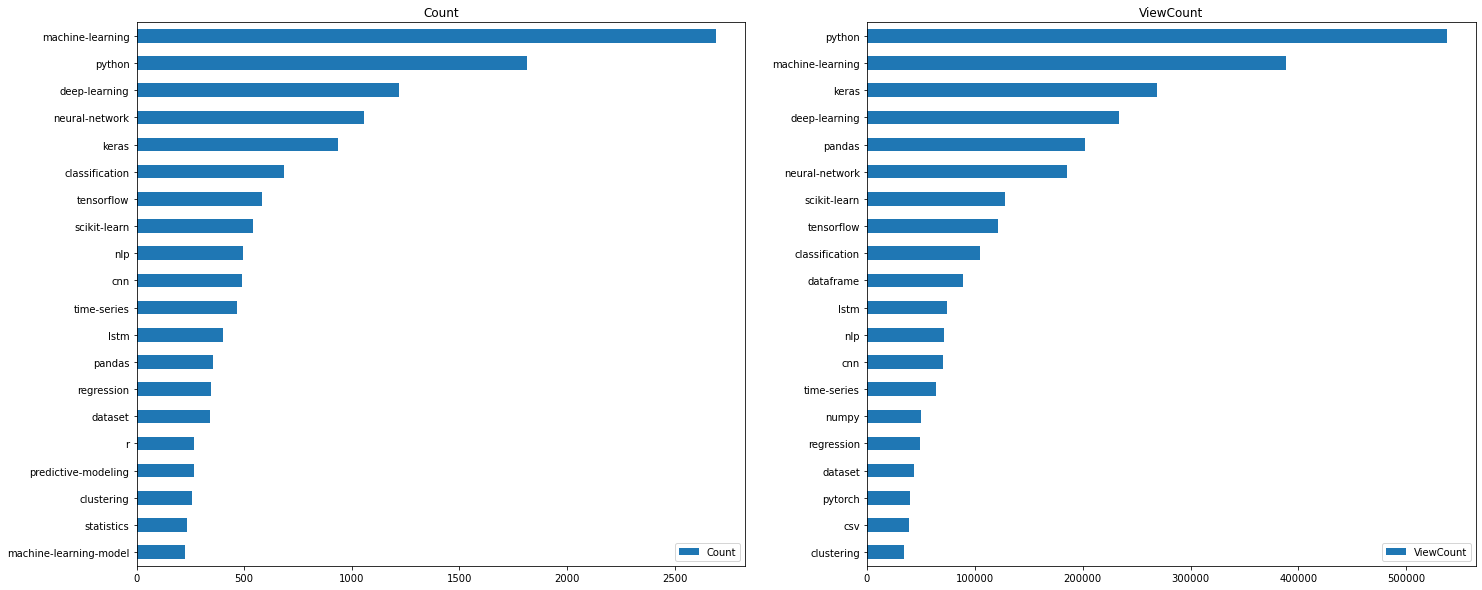

In [14]:
#Plot both horizontal bar plots on the same figure
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
most_used.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)

## Determine Relations between Tags

In [15]:
#Create a list containing all possible tags
all_tags = list(tag_count.index)
all_tags[:25]

['machine-learning',
 'data-mining',
 'regression',
 'linear-regression',
 'regularization',
 'python',
 'time-series',
 'forecast',
 'forecasting',
 'scikit-learn',
 'pca',
 'dataset',
 'bigdata',
 'data',
 'speech-to-text',
 'fuzzy-logic',
 'anomaly-detection',
 'online-learning',
 'matrix-factorisation',
 'correlation',
 'naive-bayes-classifier',
 'deep-learning',
 'keras',
 'cnn',
 'theory']

In [16]:
#Create a dataframe that stores the associations of all tags
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.head()

associations.fillna(0, inplace=True)

#For each occurence of each tag pair in the same post, add one to the associations dataframe tag pair location
for tags in questions['Tags']:
    associations.loc[tags,tags] += 1

In [17]:
associations.head()

,machine-learning,data-mining,regression,linear-regression,regularization,python,time-series,forecast,forecasting,scikit-learn,...,haar-cascade,gru,pattern-recognition,text-classification,parquet,encoder,label-smoothing,label-flipping,3d-object-detection,kitti-dataset
machine-learning,2693,95,119,68,20,499,131,9,29,188,...,0,0,1,0,0,0,0,0,0,0
data-mining,95,217,3,1,0,27,11,0,0,2,...,0,0,0,0,0,0,0,0,0,0
regression,119,3,347,35,2,59,24,1,6,37,...,0,0,0,0,0,0,0,0,0,0
linear-regression,68,1,35,175,1,30,10,1,2,27,...,0,0,0,0,0,0,0,0,0,0
regularization,20,0,2,1,50,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#Create a dataframe from associations that contains the top 20 most used tags
relations_most_used = associations.loc[most_used.index,most_used.index]

#Function to apply to the associations dataframe to gray out each tag's association to itself
def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "background-color: gray"
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,224,3,3,21,7,12,8,4,5,7,4,4,18,9,21,17,10,19,37,139
statistics,3,234,3,16,16,17,16,3,1,22,1,3,6,0,19,3,11,12,35,89
clustering,3,3,257,0,16,5,2,5,3,20,0,9,24,0,12,0,8,2,45,61
predictive-modeling,21,16,0,265,13,7,28,4,13,31,6,1,12,6,27,11,13,32,35,123
r,7,16,16,13,268,6,10,2,3,22,2,4,1,1,10,10,9,5,24,63
dataset,12,17,5,7,6,340,6,14,7,6,11,11,9,9,28,13,20,32,53,99
regression,8,16,2,28,10,6,347,6,11,24,6,2,37,9,34,31,42,21,59,119
pandas,4,3,5,4,2,14,6,354,7,19,1,3,37,3,3,3,1,1,244,62
lstm,5,1,3,13,3,7,11,7,402,87,24,19,2,43,20,133,69,103,61,71
time-series,7,22,20,31,22,6,24,19,87,466,8,0,12,9,25,51,33,44,105,131


In [19]:
#Change each tag's association to itself to NaN so it does not skew the heatmap
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i, i] = np.NaN

<AxesSubplot:>

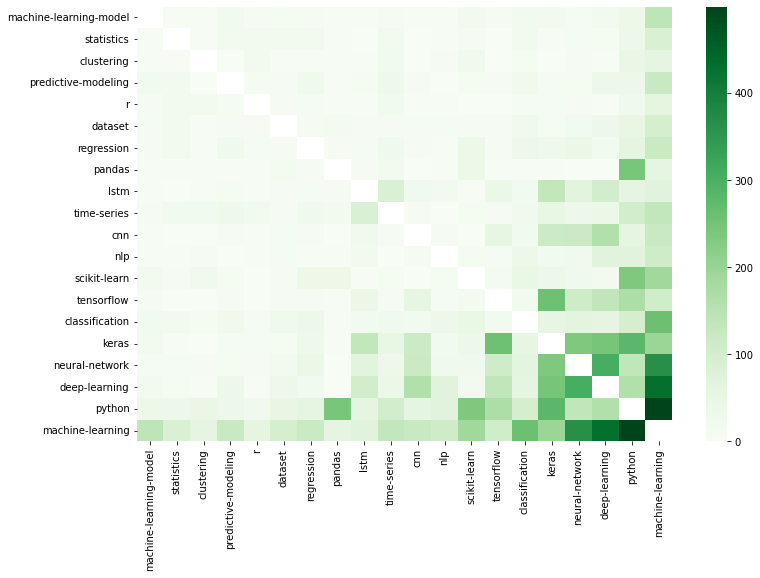

In [20]:
#Use seaborn heatmap to visualize the most popular associations
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap='Greens', annot=False)

The strongest relationships between tags seem to be those between the most popular tags. This could be because there is more likely of a chance that a tag shows up in the same post as another tag if they are both popular tags. Outside of the very generic, very popular tags such as python and machine learning, deep learning seems to be quite popular along with topic related tags such as tensorflow, neural network, and keras. Next, we'll look at the total number of deep learning questions versus the total number of questions in general to help gage the popularity of deep learning and whether it is trending up or down with time. 

## Determine Popularity of Deep Learning

In [21]:
#Read in the "all_questions" csv file
#Convert 'CreationDate' column into datetime format
all_q = pd.read_csv('all_questions.csv', parse_dates = ['CreationDate'])

In [22]:
#Convert the 'Tags' column entries to a list of tags:
#Replace the beginning < character and ending > character with nothing
#Split on the remaining >< between each tag tocreate a list
all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "").str.split("><")

C:\Users\bwil8\AppData\Local\Temp/ipykernel_11084/1199397175.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "").str.split("><")


In [23]:
#Function to apply to all_q dataframe to identify rows containing deep learning tags
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0
all_q['DeepLearning'] = all_q['Tags'].apply(class_deep_learning)
all_q.sample(5)

,Id,CreationDate,Tags,DeepLearning
7448,27807,2018-02-14 15:35:44,"[machine-learning, neural-network, classificat...",1
15440,11018,2016-04-03 20:05:25,"[r, statistics]",0
6026,5652,2015-04-30 10:06:11,"[r, gradient-descent]",0
452,55659,2019-07-14 21:31:04,"[python, deep-learning, tensorflow, cnn]",1
10151,60763,2019-09-25 16:59:55,"[time-series, logistic-regression, binary]",0


In [24]:
#Filter all_q dataframe to only include posts before 2020
all_q = all_q[all_q["CreationDate"].dt.year < 2020]

In [25]:
#Function to apply to all_q dataframe to identify the yearly quarter the post was made in
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_q["Quarter"] = all_q["CreationDate"].apply(fetch_quarter)

In [26]:
#Create a dataframe from all_q that groups by the quarter the post was made in and aggregates by the number of deep learning questions and the total number of questions in the quarter
quarterly = all_q.groupby('Quarter').agg({'DeepLearning':['sum','size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']

#Create a column in quarterly dataframe that calculates the rate that deep learning questions are asked per quarter
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]/quarterly["TotalQuestions"]
quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
8,16Q2,109,518,0.210425
17,18Q3,685,1512,0.453042
22,19Q4,809,2036,0.397348
21,19Q3,941,2394,0.393066
14,17Q4,353,898,0.393096


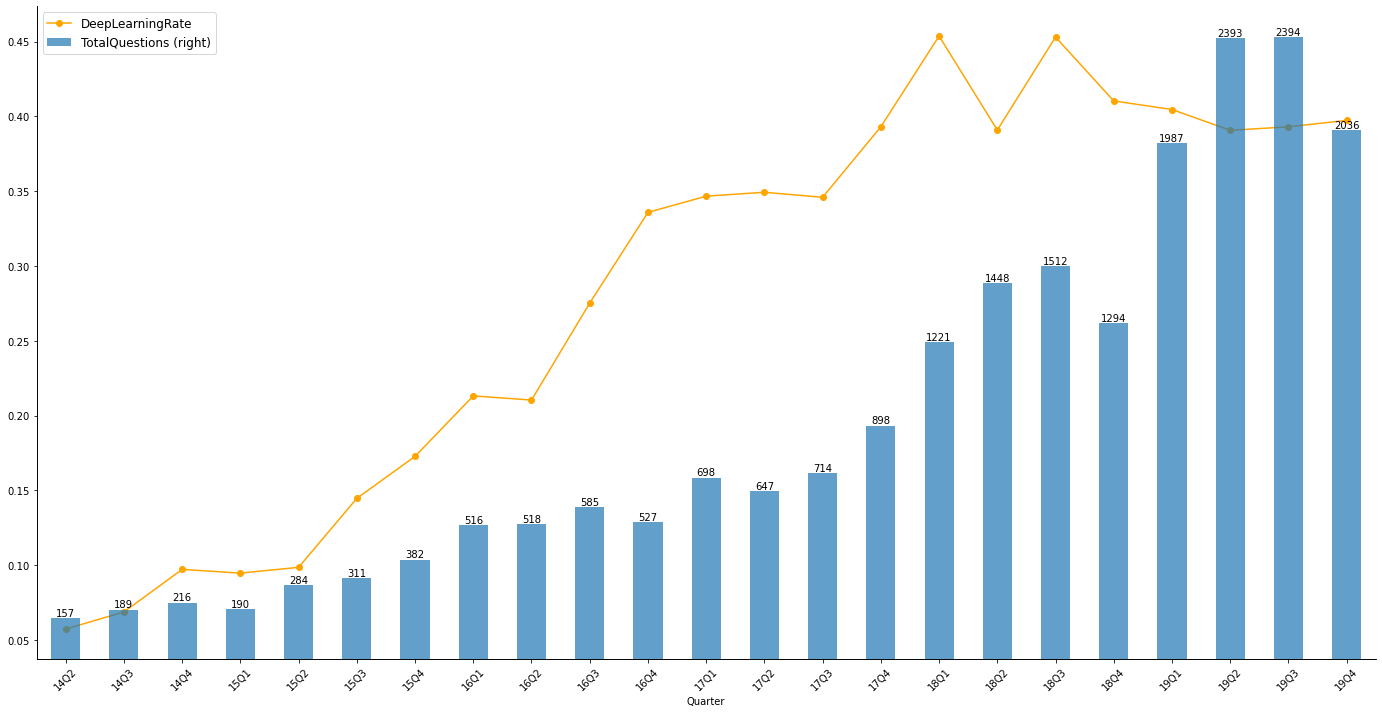

In [27]:
#Plot deep learning rate and total number of questions on the same bar plot
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")

xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

Deep learning went through a period of time between 2014 and 2018 when it was continuously gaining in popularity, increasing from a 5% rate of deep learning questions asked and peaking at about a 45% rate of deep learning questions asked. The trending popularity has since plateaued at about a 40% rate of deep learning questions asked up to the beginning of 2020. 